<a href="https://colab.research.google.com/github/jyotidabass/vehilcle-insurance-claim-prediction/blob/main/vehicle_insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the libraries

In [1]:
!git clone https://github.com/Sarah-2510/Vehicle-Insurance-Claim-Prediction.git

Cloning into 'Vehicle-Insurance-Claim-Prediction'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [2]:
import pandas as pd # data analytical library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

### Reading the test and train dataset

In [218]:
df=pd.read_csv("/content/Vehicle-Insurance-Claim-Prediction/train_SJC.csv")  #train dataset
df1=pd.read_csv("/content/Vehicle-Insurance-Claim-Prediction/Test_SJC.csv") #test dataset

In [219]:
#Checking the dataframe for training data
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


#### Renaming the column names in train data as it is "unnamed" 

In [220]:
df=df.rename(columns={"Unnamed: 0":"ClaimNumber","Unnamed: 1":"DateTimeOfAccident","Unnamed: 3":"Age","Unnamed: 4":"Gender",
                      "Unnamed: 5":"MaritalStatus","Unnamed: 6":"DependentChildren","Unnamed: 8":"WeeklyWages",
                      "Unnamed: 9":"PartTimeFullTime","Unnamed: 10":"HoursWorkedPerWeek","Unnamed: 12":"ClaimDescription",
                      "Unnamed: 13":"InitialIncurredCalimsCost","Unnamed: 14":'UltimateIncurredClaimCost'},inplace=False)

#### Dropping the first row as it has the column names in train data

In [221]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


### Data Frame Summary

In [222]:
#for training data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  obj

In [223]:
#test data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [224]:
#Checking for Categorical Data in train data
df.select_dtypes(exclude=['int64','float64']).columns 

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

##### Changing the data type for some columns in train data

In [225]:
df['Age'] = pd.to_numeric(df['Age']) 
df['DependentChildren'] = pd.to_numeric(df['DependentChildren'])
df['DependentsOther'] = pd.to_numeric(df['DependentsOther'])
df['WeeklyWages'] = pd.to_numeric(df['WeeklyWages'])
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'])
df['DaysWorkedPerWeek'] = pd.to_numeric(df['DaysWorkedPerWeek'])
df['InitialIncurredCalimsCost'] = pd.to_numeric(df['InitialIncurredCalimsCost'])
df['UltimateIncurredClaimCost'] = pd.to_numeric(df['UltimateIncurredClaimCost'])

##### To check if the data type changed or not 

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

In [227]:
 #checking the description of train data
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


##### Working on the train data

##### Checking the shape of dataset

In [228]:
df.shape 

(36176, 15)

##### Checking for duplicate values

In [229]:
df.duplicated().sum() 

0

##### Checking for missing values

In [230]:
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

##### Using mean and mode imputation to treating the missing values 

In [231]:
df['WeeklyWages']=df['WeeklyWages'].fillna(df['WeeklyWages'].mean())
df['HoursWorkedPerWeek']=df['HoursWorkedPerWeek'].fillna(df['HoursWorkedPerWeek'].mean())
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [232]:
#To verify if there are any more missing values
df.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

##### Now there are no missing values 

##### Dividing the data into categorical and numerical data

In [233]:
df_num=df[{'Age','DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
           'InitialIncurredCalimsCost','UltimateIncurredClaimCost', }]
df_cat=df[{'ClaimNumber', 'DateTimeOfAccident', 'DateReported','Gender' ,'MaritalStatus','PartTimeFullTime','ClaimDescription'}]

##### For understanding categorical data 


In [234]:
df['MaritalStatus'].value_counts()

S    17472
M    15162
U     3542
Name: MaritalStatus, dtype: int64

In [235]:
df['Gender'].value_counts()

M    27919
F     8256
U        1
Name: Gender, dtype: int64

In [236]:
df['PartTimeFullTime'].value_counts()

F    32917
P     3259
Name: PartTimeFullTime, dtype: int64

In [237]:
df['ClaimDescription'].nunique()

20596

##### There are 20596 unique claims made.

In [238]:
df.ClaimNumber.count()

36176

##### The total number of claims filed is 36176.

In [239]:
df['ClaimNumber'].nunique()

29456

##### The total number of claims that were filed is 36176 but number of unique claims are 29456.

### Data Transformation

#### Data  binning

In [240]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 1        48
2        43
3        30
4        41
5        36
         ..
36172    20
36173    35
36174    52
36175    28
36176    29
Name: Age, Length: 36176, dtype: int64>

In [241]:
df['Age'].min()

13

In [242]:
df['Age'].max()

79

In [243]:
df['Age_Bin']=pd.cut(df['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
df['Age_Bin']

1        Middle-Age
2        Middle-Age
3        Middle-Age
4        Middle-Age
5        Middle-Age
            ...    
36172         Young
36173    Middle-Age
36174           Old
36175    Middle-Age
36176    Middle-Age
Name: Age_Bin, Length: 36176, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Old']

In [244]:
df['WeeklyWages'].value_counts

<bound method IndexOpsMixin.value_counts of 1         500.00
2         509.34
3         709.10
4         555.46
5         377.10
          ...   
36172     344.16
36173    1668.83
36174     204.87
36175     730.87
36176     200.00
Name: WeeklyWages, Length: 36176, dtype: float64>

In [245]:
df['WeeklyWages'].max()

7497.0

In [246]:
df['WeeklyWages'].min()

1.0

In [247]:
df['WeeklyWages_Bin']=pd.cut(df['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df['WeeklyWages_Bin']

1                  Low
2                  Low
3                  Low
4                  Low
5                  Low
             ...      
36172              Low
36173    Below Average
36174              Low
36175              Low
36176              Low
Name: WeeklyWages_Bin, Length: 36176, dtype: category
Categories (5, object): ['Low' < 'Below Average' < 'Average Wage' < 'Above Average' < 'High']

 ## Exploratory Data Analysis : Univariate Analysis

In [248]:
#Checking the target variable 
df['UltimateIncurredClaimCost'].describe()

count    3.617600e+04
mean     1.095282e+04
std      3.529614e+04
min      1.218868e+02
25%      9.257424e+02
50%      3.373862e+03
75%      8.186852e+03
max      4.027136e+06
Name: UltimateIncurredClaimCost, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


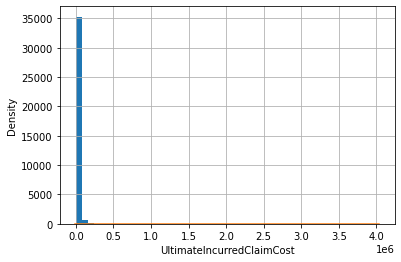

In [249]:
#Checking the skewness of the target variable 
df['UltimateIncurredClaimCost'].hist(bins=50)
sns.distplot(df['UltimateIncurredClaimCost'])

##### The data for UltimateIncurredClaimCost is right skewed.

In [250]:
df['InitialIncurredCalimsCost'].describe()

count     36176.000000
mean       7743.593874
std       18223.698531
min           1.000000
25%         700.000000
50%        2000.000000
75%        9500.000000
max      830000.000000
Name: InitialIncurredCalimsCost, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


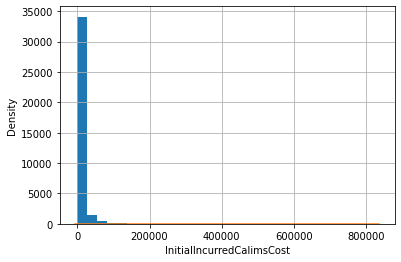

In [251]:
df['InitialIncurredCalimsCost'].hist(bins=30)
sns.distplot(df['InitialIncurredCalimsCost'])

##### The data for InitialIncurredClaimCost is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


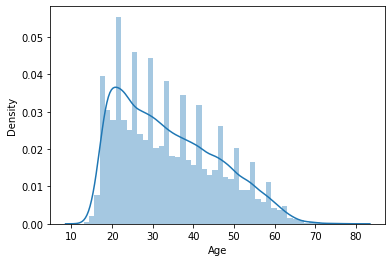

In [252]:
sns.distplot(df['Age'])

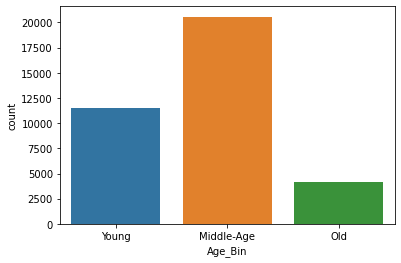

In [253]:
sns.countplot(x = 'Age_Bin', data = df)

In [254]:
df['Age_Bin'].value_counts(normalize=True)*100

Middle-Age    56.844317
Young         31.750332
Old           11.405352
Name: Age_Bin, dtype: float64

##### From both the plots we can see that the claims are higher from the middle age group (25-40) which is roughly 57%. 

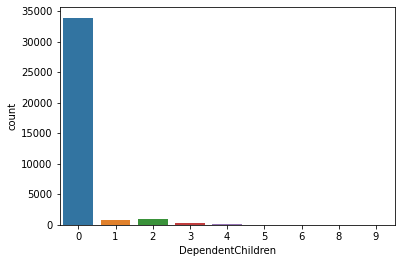

In [255]:
sns.countplot(x = 'DependentChildren', data = df)

In [256]:
df['DependentChildren'].value_counts(normalize=True)*100

0    93.703008
2     2.554180
1     2.371738
3     0.975785
4     0.284719
5     0.093985
6     0.011057
9     0.002764
8     0.002764
Name: DependentChildren, dtype: float64

##### The claims made from people with no children as dependents is high(Almost 94%).

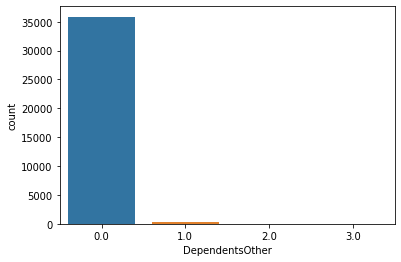

In [258]:
sns.countplot(x = 'DependentsOther', data = df)

In [259]:
df['DependentsOther'].value_counts(normalize=True)*100

0.0    99.120964
1.0     0.820986
2.0     0.041464
3.0     0.016586
Name: DependentsOther, dtype: float64

##### The claims made from people with no dependents is high (Almost 99%).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


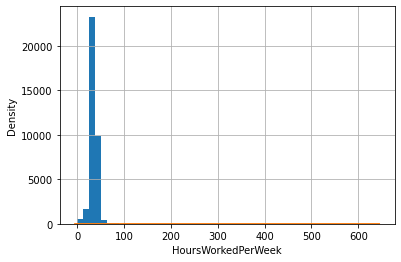

In [260]:
df['HoursWorkedPerWeek'].hist(bins=50)
sns.distplot(df['HoursWorkedPerWeek'])

##### The data for HoursWorkedPerWeek is positively skewed.

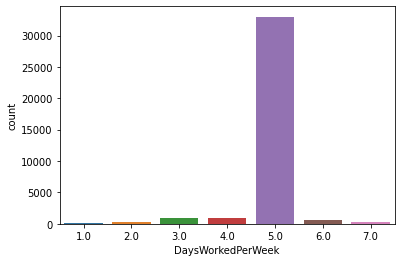

In [261]:
sns.countplot(x = 'DaysWorkedPerWeek', data = df)

In [262]:
df['DaysWorkedPerWeek'].value_counts(normalize=True)*100

5.0    91.209642
4.0     2.750442
3.0     2.642636
6.0     1.561809
2.0     0.928793
7.0     0.577731
1.0     0.328947
Name: DaysWorkedPerWeek, dtype: float64

##### From the above plot we can see that 91% of the people who have claimed for insurance work for 5 days a week. 

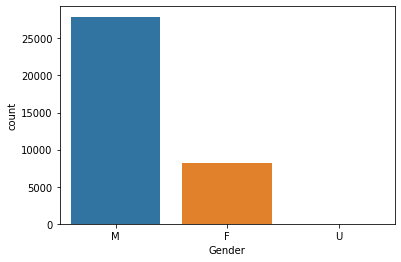

In [263]:
sns.countplot(x = 'Gender', data = df)

In [264]:
df['Gender'].value_counts(normalize=True)*100

M    77.175475
F    22.821760
U     0.002764
Name: Gender, dtype: float64

##### From the above plot we can see approximately 77% people who claimed for insurance are males while 22% are females.

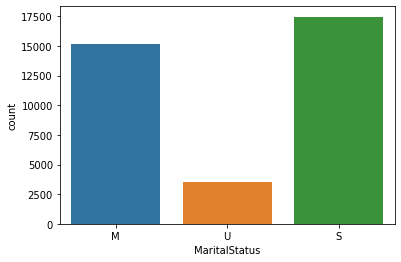

In [265]:
sns.countplot(x = 'MaritalStatus', data = df)

In [266]:
df['MaritalStatus'].value_counts(normalize=True)*100

S    48.297214
M    41.911765
U     9.791022
Name: MaritalStatus, dtype: float64

##### From the above plot we can see approximately 48% people who claimed for insurance are single while 41% are married and a very small percentage of people are unmarried.

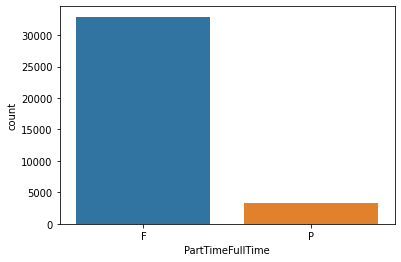

In [267]:
sns.countplot(x = 'PartTimeFullTime', data = df)

In [268]:
df['PartTimeFullTime'].value_counts(normalize=True)*100

F    90.991265
P     9.008735
Name: PartTimeFullTime, dtype: float64

##### From the above plot we can see approximately 91% of the people hold full time jobs.

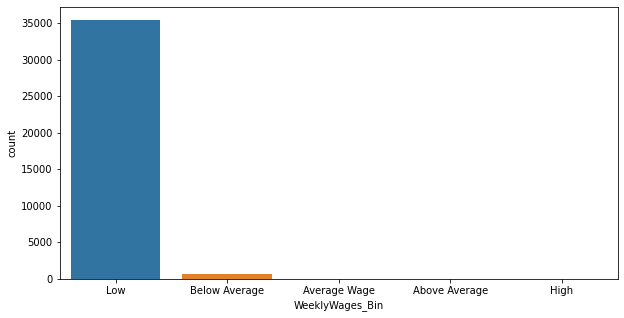

In [269]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'WeeklyWages_Bin', data = df)

In [270]:
df['WeeklyWages_Bin'].value_counts(normalize=True)*100

Low              97.910217
Below Average     1.973684
Average Wage      0.105042
Above Average     0.008293
High              0.002764
Name: WeeklyWages_Bin, dtype: float64

##### From the above plot we can see that most of the people who claimed for insurance have low wages 

## Bivariate analysis

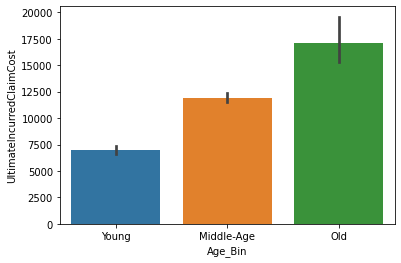

In [271]:
sns.barplot(x='Age_Bin',y='UltimateIncurredClaimCost',data=df)

##### People who are in the old age group (50-80) got more total claims payments by the insurance company. 

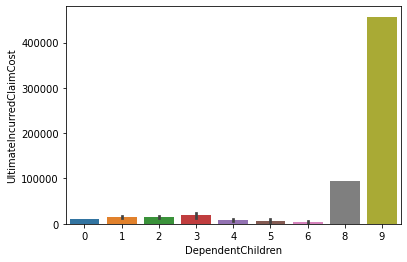

In [272]:
#plt.figure(figsize=(10,5))
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=df)
#plt.show()

##### People who have more children as dependents got more insurance payments from the insurance company.

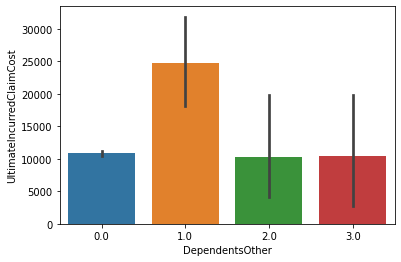

In [273]:
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=df)

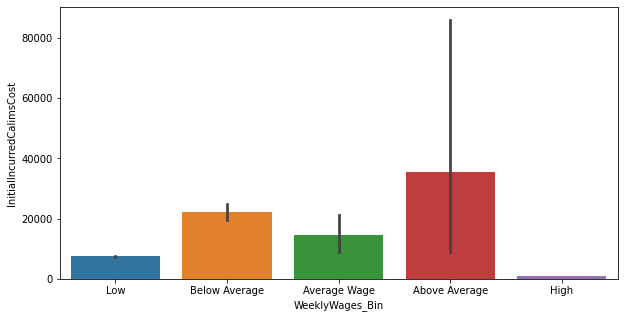

In [274]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='InitialIncurredCalimsCost',data=df)

##### People whose wages are above average claimed for more claim cost. 

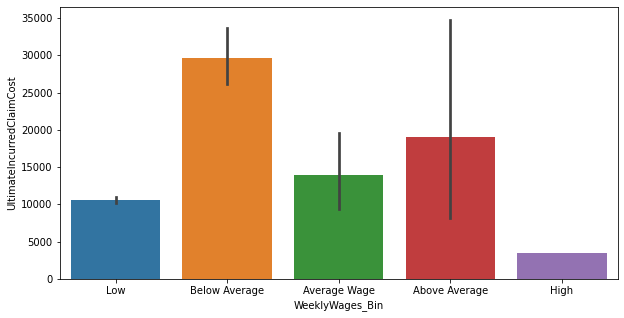

In [275]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='UltimateIncurredClaimCost',data=df)

##### People who's wages are below average and above average got more total claims payments by the insurance company.

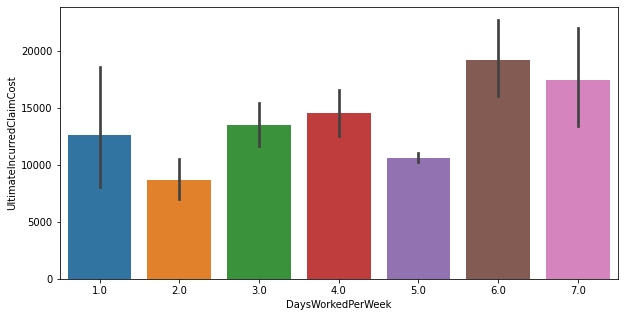

In [276]:
plt.figure(figsize=(10,5))
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df)

In [277]:
df_drop=df.drop(columns=['WeeklyWages', 'WeeklyWages_Bin','HoursWorkedPerWeek','DaysWorkedPerWeek','Age_Bin'])
df_drop.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,F,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


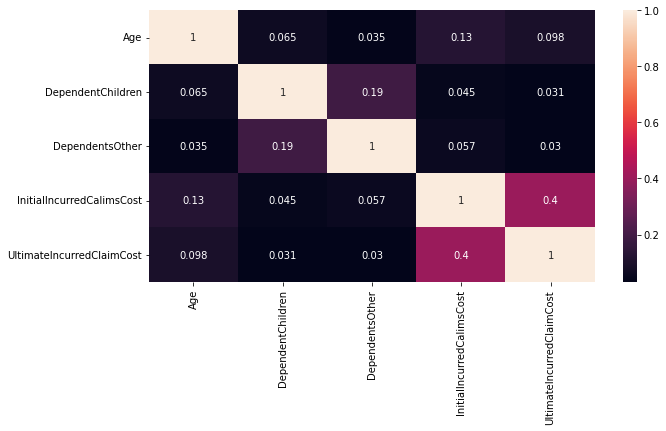

In [278]:
plt.figure(figsize=(10,5))
sns.heatmap(df_drop[['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'DependentChildren', 
       'DependentsOther','InitialIncurredCalimsCost', 'UltimateIncurredClaimCost', ]].corr(),annot=True)
plt.show()

##### There is no correlation among the numerical columns. 

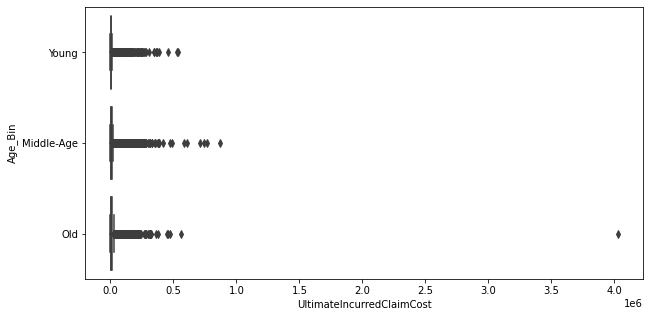

In [279]:
plt.figure(figsize=(10,5))
sns.boxplot(x='UltimateIncurredClaimCost', y='Age_Bin',data=df)

## Outlier Analysis

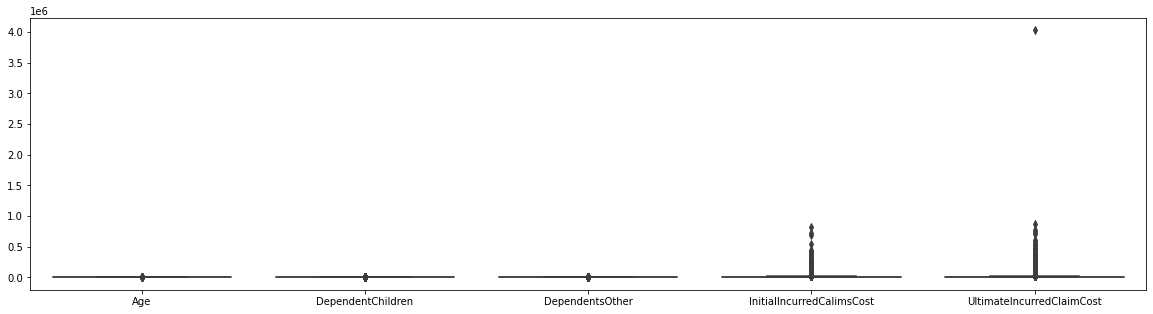

In [280]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

In [281]:
df_drop.shape

(36176, 12)

##### From the above boxplot we can see that there are a lot of outliers in "InitialIncurredCalimsCost" and "UltimateIncurredClaimCost".

In [282]:
for i in range(4):

    limit1=3*df_drop['InitialIncurredCalimsCost'].std()

    lower_limit1=df_drop['InitialIncurredCalimsCost'].mean()-limit1
    upper_limit1=df_drop['InitialIncurredCalimsCost'].mean()+limit1

    df_drop=df_drop[(df_drop['InitialIncurredCalimsCost']>lower_limit1)&(df_drop['InitialIncurredCalimsCost']<upper_limit1)]

    limit2=3*df_drop['UltimateIncurredClaimCost'].std()

    lower_limit2=df_drop['UltimateIncurredClaimCost'].mean()-limit2
    upper_limit2=df_drop['UltimateIncurredClaimCost'].mean()+limit2

    df_drop=df_drop[(df_drop['UltimateIncurredClaimCost']>lower_limit2)&(df_drop['UltimateIncurredClaimCost']<upper_limit2)]

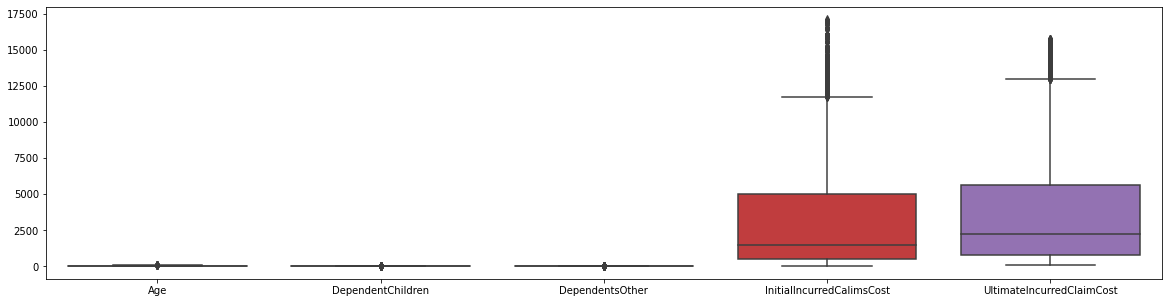

In [283]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

## Machine Learning Model

### Linear Regression Model

##### Importing the libraries for the modeling.

In [284]:
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=pre.LabelEncoder()
from sklearn.metrics import r2_score

In [285]:
for x in df.select_dtypes(include='object').columns:
    df[x]=le.fit_transform(df[x])

In [286]:
X_scale=df_drop.drop(['UltimateIncurredClaimCost'],axis='columns')
cat_df=X_scale.select_dtypes(exclude=[float,int]).columns
for i in cat_df :
    X_scale[str(i)]=le.fit_transform(X_scale[str(i)])
X_scale=X_scale.apply(pre.minmax_scale)
Y=df_drop['UltimateIncurredClaimCost']

In [287]:
#Splitting the data into test and train data
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)

In [288]:
#checking the shape of the test and train set
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21375, 11), (9162, 11), (21375,), (9162,))

In [289]:
import sklearn.linear_model as lm

In [290]:
#creating the linear regression model
glm=lm.LinearRegression()

In [291]:
#Fitting the model
glm.fit(x_train,y_train)

LinearRegression()

In [292]:
#Checking the test score
glm.score(x_test,y_test)

0.6891054728885728

In [293]:
#Checking the train score
glm.score(x_train,y_train)

0.675191214420686

In [294]:
# Checking the R square value
print ("R^2 is: \n", glm.score(x_test, y_test))

R^2 is: 
 0.6891054728885728


In [295]:
#Predictions on the test data set.
y_pred = glm.predict(x_test)

In [296]:
# Checking the RMSE score
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred,squared=False))

RMSE is: 
 1907.5440423880095


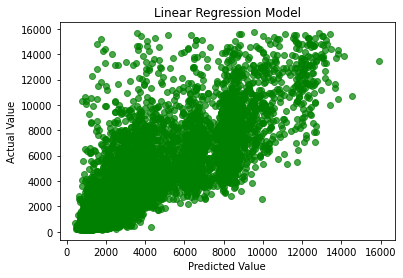

In [297]:
#Plotting the scatter plot between the predicted value and the actual values
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7,
            color='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()

### Decision tree regressor

In [298]:
#Importing the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [299]:
# creating the model
dt= DecisionTreeRegressor()

In [300]:
#Fitting the data 
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [301]:
# predicting the test set results
y_pred1= dt.predict(x_test)

In [302]:
# Calculating the r2 score
print ("R^2 is: \n", dt.score(x_test, y_test))

R^2 is: 
 0.5009138865854973


In [303]:
#Checking the RMSE value
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred1,squared=False))

RMSE is: 
 2416.883843949025


### Random Forest Regressor 

In [304]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [305]:
#checking the test score
rf.score(x_test,y_test)

0.7234694097067186

In [306]:
#Checking the train score
rf.score(x_train,y_train)

0.9503745742664778

In [307]:
#Checking the r2 score
print ("R^2 is: \n", rf.score(x_test, y_test))

R^2 is: 
 0.7234694097067186


In [308]:
#checking the predicted value
y_pred2= rf.predict(x_test)
print ('RMSE is: \n', mean_squared_error(y_test, y_pred2,squared=False))

RMSE is: 
 1799.035055014493


### Working on Test Data

In [309]:
df1=pd.read_csv("/content/Vehicle-Insurance-Claim-Prediction/Test_SJC.csv")

In [196]:
#Checking information on test data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [310]:
 #checking the description of test data
df1.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost
count,17824.000000,17824.000000,17824.000000,17824.000000,17824.000000,17824.000000,1.782400e+04
mean,33.938117,0.114901,0.010772,416.177867,37.671636,4.905689,8.039140e+03
std,12.137019,0.501956,0.115541,258.188850,12.732846,0.562258,2.468988e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00
25%,24.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02
50%,32.000000,0.000000,0.000000,390.000000,38.000000,5.000000,2.000000e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03
max,81.000000,6.000000,5.000000,7497.000000,638.000000,7.000000,2.000000e+06


In [311]:
#checking the test dataframe 
df1.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-04-19T16:00:00Z,2002-05-13T00:00:00Z,38,M,M,0,0,500.00,F,40.00,5,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEF...,1000
1,WC2445024,1989-09-26T08:00:00Z,1989-10-14T00:00:00Z,38,F,M,0,0,350.00,P,29.75,4,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-02T13:00:00Z,1994-05-17T00:00:00Z,24,M,S,0,0,487.50,F,38.00,5,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2005-11-26T06:00:00Z,2006-01-07T00:00:00Z,21,M,S,0,0,431.62,F,40.00,5,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-03-12T13:00:00Z,2003-04-10T00:00:00Z,32,M,M,3,0,480.50,F,38.00,5,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [312]:
#Checking the shape of test data 
df1.shape

(17824, 14)

In [313]:
#Checking for duplicate values
df1.duplicated().sum() 

0

##### There are no duplicate values

In [314]:
#Checking for the null values
df1.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                7
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [315]:
#Missing Value Treatment using mode imputation
df1['MaritalStatus']=df1['MaritalStatus'].fillna(df1['MaritalStatus'].mode()[0])

In [316]:
#To verify if there are more missing values in the dataset
df1.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

##### There are no missing values.

### Data Transformation

##### Data Binning

In [317]:
df1['Age_Bin']=pd.cut(df1['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
df1['Age_Bin']

0        Middle-Age
1        Middle-Age
2             Young
3             Young
4        Middle-Age
            ...    
17819    Middle-Age
17820         Young
17821         Young
17822         Young
17823         Young
Name: Age_Bin, Length: 17824, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Old']

In [318]:
df1['WeeklyWages_Bin']=pd.cut(df1['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df1['WeeklyWages_Bin']

0        Low
1        Low
2        Low
3        Low
4        Low
        ... 
17819    Low
17820    Low
17821    Low
17822    Low
17823    Low
Name: WeeklyWages_Bin, Length: 17824, dtype: category
Categories (5, object): ['Low' < 'Below Average' < 'Average Wage' < 'Above Average' < 'High']

In [319]:
df1_drop=df1.drop(columns=['WeeklyWages', 'WeeklyWages_Bin','HoursWorkedPerWeek','DaysWorkedPerWeek','Age_Bin'])

In [320]:
df1_drop.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-04-19T16:00:00Z,2002-05-13T00:00:00Z,38,M,M,0,0,F,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEF...,1000
1,WC2445024,1989-09-26T08:00:00Z,1989-10-14T00:00:00Z,38,F,M,0,0,P,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-02T13:00:00Z,1994-05-17T00:00:00Z,24,M,S,0,0,F,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2005-11-26T06:00:00Z,2006-01-07T00:00:00Z,21,M,S,0,0,F,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-03-12T13:00:00Z,2003-04-10T00:00:00Z,32,M,M,3,0,F,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [321]:
df_drop.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
6,WC6842268,1999-06-21T11:00:00Z,1999-09-09T00:00:00Z,50,M,M,0,0.0,F,STRUCK HEAD ON HEAD LACERATED HEAD,500,598.762315


In [322]:
df1_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ClaimNumber                17824 non-null  object
 1   DateTimeOfAccident         17824 non-null  object
 2   DateReported               17824 non-null  object
 3   Age                        17824 non-null  int64 
 4   Gender                     17824 non-null  object
 5   MaritalStatus              17824 non-null  object
 6   DependentChildren          17824 non-null  int64 
 7   DependentsOther            17824 non-null  int64 
 8   PartTimeFullTime           17824 non-null  object
 9   ClaimDescription           17824 non-null  object
 10  InitialIncurredCalimsCost  17824 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [323]:
label_encoder=pre.LabelEncoder()
df1_drop['ClaimNumber']=label_encoder.fit_transform(df1_drop['ClaimNumber'])
df1_drop['DateTimeOfAccident']=label_encoder.fit_transform(df1_drop['DateTimeOfAccident'])
df1_drop['DateReported']=label_encoder.fit_transform(df1_drop['DateReported'])
df1_drop['Age']=label_encoder.fit_transform(df1_drop['Age'])
df1_drop['MaritalStatus']=label_encoder.fit_transform(df1_drop['MaritalStatus'])
df1_drop['PartTimeFullTime']=label_encoder.fit_transform(df1_drop['PartTimeFullTime'])
df1_drop['ClaimDescription']=label_encoder.fit_transform(df1_drop['ClaimDescription'])

In [324]:
df1_drop.dtypes

ClaimNumber                   int64
DateTimeOfAccident            int64
DateReported                  int64
Age                           int64
Gender                       object
MaritalStatus                 int64
DependentChildren             int64
DependentsOther               int64
PartTimeFullTime              int64
ClaimDescription              int64
InitialIncurredCalimsCost     int64
dtype: object

In [325]:
def test_pre(data):
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import minmax_scale
    #label_encoder=pre.LabelEncoder()
    data=data.apply(minmax_scale)
    #data['Age']=label_encoder.fit_transform(data['Age'])
    #data['MaritalStatus']=label_encoder.fit_transform(data['MaritalStatus'])
    #data['ClaimDescription']=label_encoder.fit_transform(data['ClaimDescription'])
    return data

In [328]:
y_pred

array([3600.92002024, 1271.92006299, 1364.90593212, ..., 2508.63986099,
       1272.91095779, 5179.4770579 ])

In [329]:
result=y_pred